# The Variational Principle and Parameterized Quantum Circuits

In quantum mechanics, the **variational principle** states that for any trial wavefunction $|\psi(\theta)\rangle$ (where $\theta$ represents a set of parameters), the expectation value of the Hamiltonian provides an upper bound to the ground state energy. Mathematically, this is expressed as:

$$
E(\theta) = \langle \psi(\theta) | H | \psi(\theta) \rangle \geq E_0
$$

where:
- $E(\theta)$ is the energy expectation value for the state $|\psi(\theta)\rangle$,
- $E_0$ is the true ground state energy of the system.

The goal of variational quantum algorithms, such as the Variational Quantum Eigensolver (VQE), is to **minimize** $E(\theta)$ by adjusting the parameters $\theta$. This minimization allows us to approximate the ground state of the system.

A **parameterized quantum circuit** (often called an **ansatz**) is used to prepare the trial state $|\psi(\theta)\rangle$. By tuning the parameters in the circuit, we can explore different quantum states. The efficiency and accuracy of VQE critically depend on the choice of ansatz — it must be flexible enough to represent the target state, yet simple enough to implement on current quantum hardware.

Below, we show an example of a simple ansatz implemented in Qiskit.


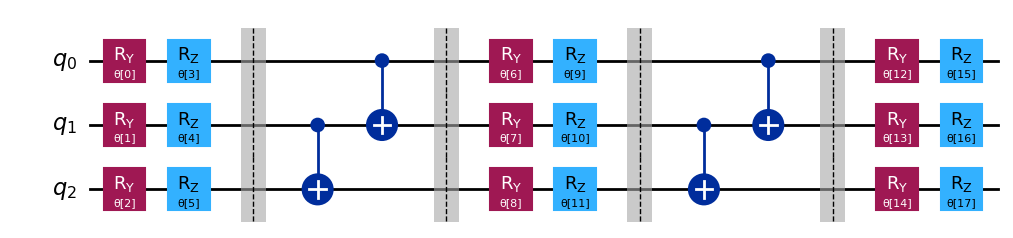

In [1]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(3, reps=2, insert_barriers=True)
ansatz.decompose().draw('mpl')

# Parameterized Quantum Ansatz(EfficientSU2)

In variational quantum algorithms, the choice of **ansatz** is critical, as it determines the expressiveness of the quantum state we prepare. The ansatz implemented here is a **layered parameterized circuit**, consisting of alternating **rotation layers** and **entanglement layers**.

### Structure of the Ansatz

The ansatz follows a repeating pattern of:

1. **Rotation layers:**
   - Each qubit undergoes a parameterized **( $R_y$ )** and **( $R_z$ )** rotation.
   - The parameters are different for each layer, ensuring flexibility in state representation.

2. **Entanglement layers:**
   - A chain of **CNOT gates** is applied between adjacent qubits to introduce entanglement.
   - This structure is known as a **nearest-neighbor entanglement pattern**, commonly used in hardware-efficient ansätze.

3. **Repetition (`reps`):**
   - The pattern of rotations and entangling gates is repeated multiple times.
   - More repetitions increase the expressive power but also add to computational complexity.

### Mathematical Representation

Each layer applies the following unitary transformation:

$$
U_{\text{rep}}(\theta) = U_{\text{ent}} U_{\text{rot}}(\theta)
$$

where:

- $U_{\text{rot}}(\theta)$ consists of  **( $R_y$ )** and **( $R_z$ )** rotations.
- $U_{\text{ent}}$ is the entangling operation implemented using **CNOT** gates.


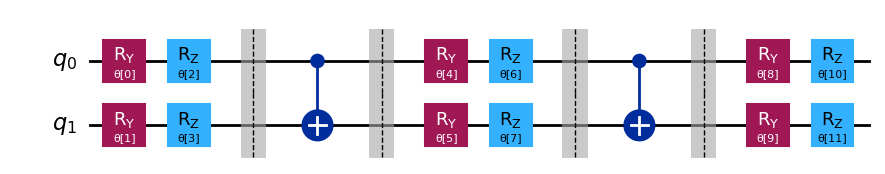

In [2]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(2, reps=2, insert_barriers=True)
ansatz.decompose().draw('mpl')

## Pseudocode


1. Initialize a quantum circuit with `num_qubits`.
2. Define a `ParameterVector` to store all trainable parameters.
3. Create helper functions:
   - `_ry_layer`: Applies `RY` gates to all qubits.
   - `_rz_layer`: Applies `RZ` gates to all qubits.
   - `_cnot_layer`: Applies a chain of CNOT gates between adjacent qubits.
4. Loop over repetitions (`reps`):
   - Apply an `RY` rotation layer using a subset of parameters.
   - Apply an `RZ` rotation layer using a subset of parameters.
   - Apply a `CNOT` layer.
5. Add a final set of `RY` and `RZ` rotations at the end.
6. Return the final parameterized ansatz circuit.


# Parameterized Quantum Ansatz - Hands-on Task

In variational quantum algorithms, the **ansatz** determines how we explore the solution space. In this exercise, you will construct a **layered parameterized circuit** by filling in the missing helper functions.

### Structure of the Ansatz

The ansatz follows a repeating pattern of:

1. **Rotation layers:**
   - Each qubit undergoes a parameterized **( $R_y$ )** and **( $R_z$ )** rotation.
   - The parameters are different for each layer, ensuring flexibility in state representation.

2. **Entanglement layers:**
   - A chain of **CNOT gates** is applied between adjacent qubits to introduce entanglement.
   - This structure is known as a **nearest-neighbor entanglement pattern**, commonly used in hardware-efficient ansätze.

3. **Repetition (`reps`):**
   - The pattern of rotations and entangling gates is repeated multiple times.
   - More repetitions increase the expressive power but also add to computational complexity.

## Your Task

You need to complete the following helper functions:

- `def _ry_layer(params, num_qubits):`  
  - This function should apply \( R_y(\theta) \) gates to all qubits.  

- `def _rz_layer(params, num_qubits):`  
  - This function should apply \( R_z(\theta) \) gates to all qubits.  

- `def _cnot_layer(num_qubits):`  
  - This function should apply **CNOT gates** between adjacent qubits.  

## Pseudocode


1. Initialize a quantum circuit with `num_qubits`.
2. Define a `ParameterVector` to store all trainable parameters.
3. Implement the helper functions:
   - `_ry_layer`: Applies `RY` gates to all qubits.
   - `_rz_layer`: Applies `RZ` gates to all qubits.
   - `_cnot_layer`: Applies a chain of CNOT gates between adjacent qubits.
4. Loop over repetitions (`reps`):
   - Apply an `RY` rotation layer.
   - Apply an `RZ` rotation layer.
   - Apply a `CNOT` layer.
5. Add a final `RY` and `RZ` layer at the end.
6. Return the final parameterized ansatz circuit.


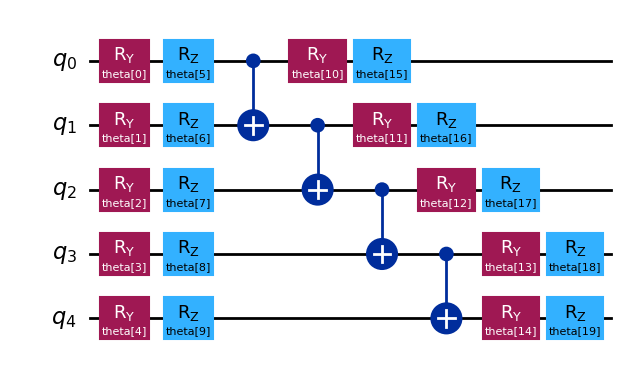

In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

def create_ansatz_circuit(num_qubits, reps):
    """
    Create a parameterized ansatz circuit with a given number of qubits and layers.
    
    Args:
        num_qubits (int): Number of qubits in the circuit.
        num_layers (int): Number of parameterized layers.
    
    Returns:
        QuantumCircuit: A parameterized quantum circuit.
    """
    # Initialize a quantum circuit with the specified number of qubits.
    qc = QuantumCircuit(num_qubits)
    
    parameter_vector = ParameterVector('theta', 2 * num_qubits * (reps + 1))
    
    # Helper function to add a layer of RY gates to the circuit
    def _ry_layer(params, num_qubits):  
    ######################################################################
    # Provide your code here


    #####################################################################
        return circuit



    # Helper function to add a layer of RZ gates to the circuit
    def _rz_layer(params, num_qubits):  
    ######################################################################
    # Provide your code here


    #####################################################################
        return circuit



    # Helper function to add CNOT gates between adjacent qubits
    def _cnot_layer( num_qubits): 
    ######################################################################
    # Provide your code here



    #####################################################################
        return circuit
    
    
    for i in range(reps):
        qc=qc.compose(_ry_layer(parameter_vector[2*i*num_qubits:(2*i+1)*num_qubits], num_qubits=num_qubits))
        qc=qc.compose(_rz_layer(parameter_vector[(2*i+1)*num_qubits:(2*i+2)*num_qubits], num_qubits=num_qubits))
        qc=qc.compose(_cnot_layer(num_qubits))

    qc=qc.compose(_ry_layer(parameter_vector[-2*num_qubits:-num_qubits], num_qubits=num_qubits))
    qc=qc.compose(_rz_layer(parameter_vector[-num_qubits:], num_qubits=num_qubits))
    
    return qc


ansatz_circuit = create_ansatz_circuit(num_qubits=5, reps=1)
ansatz_circuit.draw(output='mpl')


In [10]:
import sys
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [11]:
from correctors import correct_task_1
correct_task_1(create_ansatz_circuit)

Task 1 is correct


### Breakdown of the Ansatz Implementation

The ansatz is constructed using helper functions:
- **_ry_layer(params, num_qubits)**: Applies \( R_y \) gates to all qubits.
- **_rz_layer(params, num_qubits)**: Applies \( R_z \) gates to all qubits.
- **_cnot_layer(num_qubits)**: Applies a chain of CNOT gates to introduce entanglement.

The final circuit is built by:
1. Repeating the **rotation + entanglement layers** for the specified number of repetitions (`reps`).
2. Ending with a final set of **( $R_y$ )** and **( $R_z$ )** rotations.
